In [1]:
from Hilbert2D import Hilbert2D
from Hilbert3D import Hilbert3D

/home/eliska/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/eliska/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


# 2D Hilbertova křivka 

## Test mezivýpočtů pro výpočet bodu křivky 

In [2]:

h2d = Hilbert2D(15)

Q = h2d.dec_to_quarter(0.2)
print("Quarter Q:", Q)

e0, dj = h2d.ej_and_dj_counter(Q)
result = h2d.calculate_point(e0, dj, Q)
print("Calculated point:", result)


Quarter Q: [0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0]
Calculated point: [[0.20001221]
 [0.40002441]]


In [3]:

h = [2, 0, 3]
e0, dj = h2d.ej_and_dj_counter(h)
print("e0:", e0)
print("dj:", dj)

result = h2d.calculate_point(e0, dj, h)
print("Point from [2,0,3]:", result)

e0: [0. 0. 1.]
dj: [0. 0. 1.]
Point from [2,0,3]: [[0.625]
 [0.75 ]]


##  Hledání minima za využití algoritmu z knihovny scipy.optimize

In [4]:
print("Opravdové minimum f = 1.0")
for n in [2,3,4,5,6,7,8,25]:
    h2d = Hilbert2D(10)
    t_min, h_min, f_min = h2d.find_minimum(n,0)
    print(f"precision={n:3d}  =>  t = {t_min:.6f},  h(t) = ({h_min[0]:.4f}, {h_min[1]:.4f}),  f = {f_min:.6f}")

Opravdové minimum f = 1.0
precision=  2  =>  t = 0.387500,  h(t) = (0.2998, 0.8496),  f = 1.011192
precision=  3  =>  t = 0.375001,  h(t) = (0.2510, 0.7500),  f = 1.002452
precision=  4  =>  t = 0.378125,  h(t) = (0.3008, 0.7754),  f = 1.002842
precision=  5  =>  t = 0.377539,  h(t) = (0.3018, 0.8115),  f = 1.006220
precision=  6  =>  t = 0.376954,  h(t) = (0.2812, 0.7812),  f = 1.003477
precision=  7  =>  t = 0.378661,  h(t) = (0.2969, 0.7510),  f = 1.001304
precision=  8  =>  t = 0.382246,  h(t) = (0.3291, 0.7842),  f = 1.003967
precision= 25  =>  t = 0.378922,  h(t) = (0.3125, 0.7539),  f = 1.001531


In [5]:
print("Opravdové minimum f = -1.0")
for n in [2,3,4,5,6,7,8]:
    h2d = Hilbert2D(10)
    t_min, h_min, f_min = h2d.find_minimum(n,1)
    print(f"precision={n:3d}  =>  t = {t_min:.6f},  h(t) = ({h_min[0]:.4f}, {h_min[1]:.4f}),  f = {f_min:.6f}")

Opravdové minimum f = -1.0
precision=  2  =>  t = 0.687499,  h(t) = (0.9990, 0.7500),  f = 1.245567
precision=  3  =>  t = 0.671874,  h(t) = (1.0000, 0.8760),  f = 1.260484
precision=  4  =>  t = 0.667968,  h(t) = (0.9990, 0.9385),  f = 1.272752
precision=  5  =>  t = 0.666992,  h(t) = (1.0000, 0.9697),  f = 1.281376
precision=  6  =>  t = 0.744875,  h(t) = (1.0000, 0.6084),  f = 1.249195
precision=  7  =>  t = 0.666444,  h(t) = (0.9834, 0.9922),  f = 1.276203
precision=  8  =>  t = 0.666673,  h(t) = (1.0000, 0.9961),  f = 1.288836


In [6]:

print("Opravdové minimum f = -1.0")
for n in [2,3,4,5,6,7,8,10,11,12,13]:
    h2d = Hilbert2D(10)
    t_min, h_min, f_min = h2d.find_minimum_mapped(n,-5,5,-5,5,1)
    print(f"precision={n:3d}  =>  t = {t_min:.6f},  h(t) = ({h_min[0]:.4f}, {h_min[1]:.4f}),  f = {f_min:.6f}")

Opravdové minimum f = -1.0
precision=  2  =>  t = 0.633790,  h(t) = (2.8516, 2.5000),  f = 4.552424
precision=  3  =>  t = 0.382803,  h(t) = (-2.5000, 3.1242),  f = 2.711152
precision=  4  =>  t = 0.367132,  h(t) = (-3.1250, 3.1339),  f = 3.700411
precision=  5  =>  t = 0.361333,  h(t) = (-2.8141, 3.4375),  f = 4.136436
precision=  6  =>  t = 0.361573,  h(t) = (-2.8131, 3.2812),  f = 0.947096
precision=  7  =>  t = 0.361636,  h(t) = (-2.8164, 3.2031),  f = 0.215062
precision=  8  =>  t = 0.361650,  h(t) = (-2.8154, 3.1641),  f = 0.046597
precision= 10  =>  t = 0.361653,  h(t) = (-2.8125, 3.1421),  f = 0.006380
precision= 11  =>  t = 0.361653,  h(t) = (-2.8125, 3.1398),  f = 0.004590
precision= 12  =>  t = 0.361652,  h(t) = (-2.8223, 3.1445),  f = 0.016368
precision= 13  =>  t = 0.361652,  h(t) = (-2.8223, 3.1445),  f = 0.016368


In [7]:
print("Opravdové minimum f = 0.0")
for n in [2,3,4,5,6,7,8]:
    h2d = Hilbert2D(10)
    t_min, h_min, f_min = h2d.find_minimum(n,2)
    print(f"precision={n:3d}  =>  t = {t_min:.6f},  h(t) = ({h_min[0]:.4f}, {h_min[1]:.4f}),  f = {f_min:.6f}")

Opravdové minimum f = 0.0
precision=  2  =>  t = 0.610577,  h(t) = (0.7500, 0.8340),  f = 1.110226
precision=  3  =>  t = 0.625000,  h(t) = (0.7490, 0.7500),  f = 1.102061
precision=  4  =>  t = 0.500000,  h(t) = (0.5000, 0.5010),  f = 1.039805
precision=  5  =>  t = 0.552359,  h(t) = (0.6045, 0.6299),  f = 1.048816
precision=  6  =>  t = 0.552490,  h(t) = (0.5947, 0.6406),  f = 1.045195
precision=  7  =>  t = 0.552428,  h(t) = (0.5938, 0.6318),  f = 1.045468
precision=  8  =>  t = 0.552169,  h(t) = (0.6104, 0.6279),  f = 1.050756


## Hledání minima za pomoci Hoelderova algoritmu

## Pro vlastní funkci


    Iterace n  Rozdíl mapped  Rozdíl nemapped
0           1       0.020000         0.037729
1           2       0.001251         0.013728
2           3       0.002578         0.002155
3           4       0.000086         0.000281
4           5       0.000118         0.000169
5           6       0.000089         0.000020
6           7       0.000173         0.000096
7           8       0.000097         0.000091
8           9       0.000125         0.000141
9          10       0.000036         0.000033
10         11       0.000211         0.000211
11         12       0.000058         0.000060
12         13       0.000132         0.000133
13         14       0.000231         0.000231
14         15       0.000054         0.000053
15         16       0.000018         0.000018
16         17       0.000193         0.000193
17         18       0.000049         0.000049
18         19       0.000066         0.000066
19         20       0.000079         0.000079
20         21       0.000051      

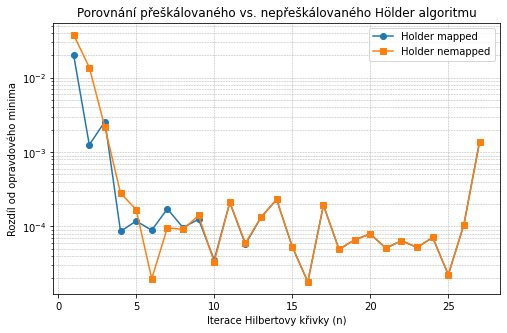

In [8]:
h2d = Hilbert2D(50)

H = 2 * 1.4142 * 5**(1/2)
r = 1.1
eps = 1e-5
N_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
max_iter = 100

df = h2d.compare_algorithms(H, r, eps, max_iter, N_vals, 0, 1, 0, 1, 0, 1.0)

In [9]:

H = 2 * 1.4142 * 5**(1/2)   # Lipschitz/Hölder odhad
r = 1.1
eps = 1e-5
N = [1,2,3,4,5,6,7,8,9,10,20,25] 
max_iter = 100
print("Opravdové minimum f = 1.0")
for n in N:
    t_min, f_min, x_min, y_min = h2d.Holder_algorithm(H, r, eps, max_iter,n,0)
    print(f"Iterace hilbertovy křivky: {n}")
    print(f"  Souřadnice (x,y): ({x_min}, {y_min})")
    print(f"  Hodnota f: {f_min}")
    print("-" * 40)

Opravdové minimum f = 1.0
Iterace hilbertovy křivky: 1
  Souřadnice (x,y): (0.34105002880096436, 0.9716101139783859)
  Hodnota f: 1.037728579439956
----------------------------------------
Iterace hilbertovy křivky: 2
  Souřadnice (x,y): (0.28916484117507935, 0.8653452470898628)
  Hodnota f: 1.0137282257009845
----------------------------------------
Iterace hilbertovy křivky: 3
  Souřadnice (x,y): (0.2636658102273941, 0.7546705529093742)
  Hodnota f: 1.0021545213509242
----------------------------------------
Iterace hilbertovy křivky: 4
  Souřadnice (x,y): (0.2774161249399185, 0.6927864477038383)
  Hodnota f: 1.0002810333747294
----------------------------------------
Iterace hilbertovy křivky: 5
  Souřadnice (x,y): (0.30083686113357544, 0.681640699505806)
  Hodnota f: 1.0001688821255965
----------------------------------------
Iterace hilbertovy křivky: 6
  Souřadnice (x,y): (0.3044735714793205, 0.695576474070549)
  Hodnota f: 1.0000197902117145
-------------------------------------

In [10]:
H = 2 * 1.4142 * 5**(1/2)   # Lipschitz/Hölder odhad
r = 1.1
eps = 1e-5
N = [1,2,3,4,5,6,7,8,9,10,20,25] 
max_iter = 100
print("Opravdové minimum f = 1.0")
for n in N:
    t_min, f_min, x_min, y_min = h2d.Holder_algorithm_mapped(H, r, eps, max_iter,n,0,1,0,1,0)
    print(f"Iterace hilbertovy křivky: {n}")
    print(f"  Souřadnice (x,y): ({x_min}, {y_min})")
    print(f"  Hodnota f: {f_min}")
    print("-" * 40)

Opravdové minimum f = 1.0
Iterace hilbertovy křivky: 1
  Souřadnice (x,y): (0.30076476213796566, 0.5)
  Hodnota f: 1.0200002924305638
----------------------------------------
Iterace hilbertovy křivky: 2
  Souřadnice (x,y): (0.29866031731776377, 0.75)
  Hodnota f: 1.0012508973748446
----------------------------------------
Iterace hilbertovy křivky: 3
  Souřadnice (x,y): (0.25, 0.7515336645917725)
  Hodnota f: 1.0025778592931287
----------------------------------------
Iterace hilbertovy křivky: 4
  Souřadnice (x,y): (0.3125, 0.7039323193752471)
  Hodnota f: 1.0000858565678346
----------------------------------------
Iterace hilbertovy křivky: 5
  Souřadnice (x,y): (0.3089599213942549, 0.6875)
  Hodnota f: 1.0001182650956957
----------------------------------------
Iterace hilbertovy křivky: 6
  Souřadnice (x,y): (0.3125, 0.6953252414464153)
  Hodnota f: 1.000089051683767
----------------------------------------
Iterace hilbertovy křivky: 7
  Souřadnice (x,y): (0.2862610189532404, 0.68

## Pro Himmelblauovu funkci 

    Iterace n  Rozdíl mapped  Rozdíl nemapped
0           1      13.272717       123.252940
1           2       4.557070       115.294375
2           3       2.718473       110.751778
3           4       0.028654       108.376297
4           5       0.711841       107.185824
5           6       0.649227       106.608531
6           7       0.336357       106.304214
7           8       0.228365       106.148805
8           9       0.585982       106.075397
9          10       0.834920       106.036943
10         11       0.754575       106.018543
11         12       0.050479       106.009212
12         13       0.648587       106.004898
13         14       0.600591       106.002521
14         15       0.041513       106.001350
15         16       0.229899       106.000722
16         17       0.160817       106.000350
17         18       0.197696       106.000358
18         19       0.578636       106.000467
19         20       0.172482       106.000239
20         21       0.069372      

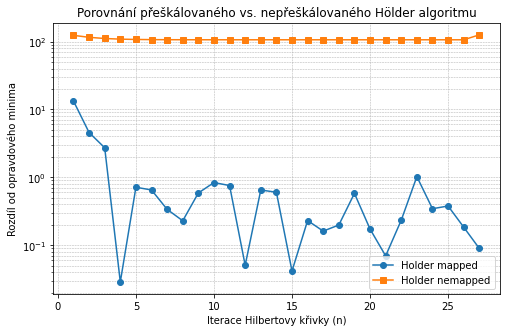

In [13]:
H = 2 * 1.4142 * 5**(1/2)
r = 1.1
eps = 1e-5
N_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
max_iter = 200

df = h2d.compare_algorithms(H, r, eps, max_iter,N_vals,-5,5,-5,5,1,0.0)

## Pro Matyasovu funkci

    Iterace n  Rozdíl mapped  Rozdíl nemapped
0           1       0.961540              0.0
1           2       0.240387              0.0
2           3       0.060101              0.0
3           4       0.015029              0.0
4           5       0.003833              0.0
5           6       0.001200              0.0
6           7       0.000413              0.0
7           8       0.000232              0.0
8           9       0.000062              0.0
9          10       0.000234              0.0
10         11       0.000033              0.0
11         12       0.001245              0.0
12         13       0.001099              0.0
13         14       0.002416              0.0
14         15       0.001972              0.0
15         16       0.001028              0.0
16         17       0.000906              0.0
17         18       0.000862              0.0
18         19       0.000478              0.0
19         20       0.000410              0.0
20         21       0.000110      

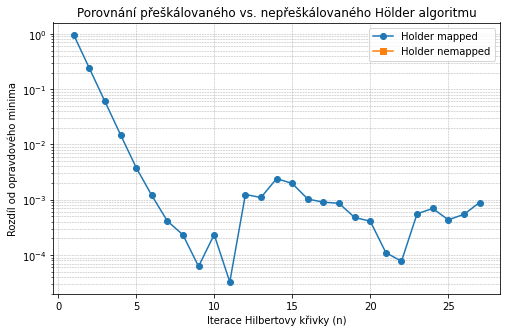

In [14]:
H = 2 * 1.4142 * 5**(1/2)
r = 1.1
eps = 1e-5
N_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
max_iter = 200

df = h2d.compare_algorithms(H, r, eps, max_iter,N_vals,-5,5,-5,5,2,0.0)

In [ ]:
H = 2 * 1.4142 * 5**(1/2)   # Lipschitz/Hölder odhad
r = 1.1
eps = 1e-5
N = [1,2,3,4,5,6,7,8,9,10,20,21,22,23,24,25,26,27] 
max_iter = 100
print("Opravdové minimum f = 0.0")
for n in N:
    t_min, f_min, x_min, y_min = h2d.Holder_algorithm_mapped(H, r, eps, max_iter,n,-5,5,-5,5,1)
    print(f"Iterace hilbertovy křivky: {n}")
    print(f"  Souřadnice (x,y): ({x_min}, {y_min})")
    print(f"  Hodnota f: {f_min}")
    print("-" * 40)

Opravdové minimum f = 0.0
Iterace hilbertovy křivky: 1
  Souřadnice (x,y): (3.4008292305944003, 0.0)
  Hodnota f: 13.273978221149033
----------------------------------------
Iterace hilbertovy křivky: 2
  Souřadnice (x,y): (2.8927169045048284, 2.5)
  Hodnota f: 4.608709640881379
----------------------------------------
Iterace hilbertovy křivky: 3
  Souřadnice (x,y): (-2.5, 3.091412372729515)
  Hodnota f: 2.7541426183213624
----------------------------------------
Iterace hilbertovy křivky: 4
  Souřadnice (x,y): (-3.75, -3.2785089872662354)
  Hodnota f: 0.046661783725520156
----------------------------------------
Iterace hilbertovy křivky: 5
  Souřadnice (x,y): (3.700089755958267, -1.875)
  Hodnota f: 0.7118409466027372
----------------------------------------
Iterace hilbertovy křivky: 6
  Souřadnice (x,y): (2.8125, 1.8310931958121301)
  Hodnota f: 2.28100629228529
----------------------------------------
Iterace hilbertovy křivky: 7
  Souřadnice (x,y): (2.9898656765158194, 2.265625)

In [ ]:
H = 2 * 1.4142 * 5**(1/2)   # Lipschitz/Hölder odhad
r = 1.1
eps = 1e-5
N = [1,2,3,4,5,6,7,8,9,10] 
max_iter = 100
print("Opravdové minimum f = 0.0")
for n in N:
    t_min, f_min, x_min, y_min = h2d.Holder_algorithm(H, r, eps, max_iter,n,2)
    print(f"Iterace hilbertovy křivky: {n}")
    print(f"  Souřadnice (x,y): ({x_min}, {y_min})")
    print(f"  Hodnota f: {f_min}")
    print("-" * 40)

Opravdové minimum f = 0.0
Iterace hilbertovy křivky: 1
  Souřadnice (x,y): (0.0, 0.0)
  Hodnota f: 0.0
----------------------------------------
Iterace hilbertovy křivky: 2
  Souřadnice (x,y): (0.0, 0.0)
  Hodnota f: 0.0
----------------------------------------
Iterace hilbertovy křivky: 3
  Souřadnice (x,y): (0.0, 0.0)
  Hodnota f: 0.0
----------------------------------------
Iterace hilbertovy křivky: 4
  Souřadnice (x,y): (0.0, 0.0)
  Hodnota f: 0.0
----------------------------------------
Iterace hilbertovy křivky: 5
  Souřadnice (x,y): (0.0, 0.0)
  Hodnota f: 0.0
----------------------------------------
Iterace hilbertovy křivky: 6
  Souřadnice (x,y): (0.0, 0.0)
  Hodnota f: 0.0
----------------------------------------
Iterace hilbertovy křivky: 7
  Souřadnice (x,y): (0.0, 0.0)
  Hodnota f: 0.0
----------------------------------------
Iterace hilbertovy křivky: 8
  Souřadnice (x,y): (0.0, 0.0)
  Hodnota f: 0.0
----------------------------------------
Iterace hilbertovy křivky: 9
 

In [ ]:
H = 2 * 1.4142 * 5**(1/2)   # Lipschitz/Hölder odhad
r = 1.1
eps = 1e-5
N = [1,2,3,4,5,6,7,8,9,10,20,21,22,23,24,25,26,27] 
max_iter = 100
print("Opravdové minimum f = 0.0")
for n in N:
    t_min, f_min, x_min, y_min = h2d.Holder_algorithm_mapped(H, r, eps, max_iter,n,-10,10,-10,10,2)
    print(f"Iterace hilbertovy křivky: {n}")
    print(f"  Souřadnice (x,y): ({x_min}, {y_min})")
    print(f"  Hodnota f: {f_min}")
    print("-" * 40)

Opravdové minimum f = 0.0
Iterace hilbertovy křivky: 1
  Souřadnice (x,y): (-10.0, -9.235904673967793)
  Hodnota f: 3.8461607030758245
----------------------------------------
Iterace hilbertovy křivky: 2
  Souřadnice (x,y): (-5.0, -4.621996960729415)
  Hodnota f: 0.9615498295473106
----------------------------------------
Iterace hilbertovy křivky: 3
  Souřadnice (x,y): (-2.5, -2.2765438283894213)
  Hodnota f: 0.240636874602965
----------------------------------------
Iterace hilbertovy křivky: 4
  Souřadnice (x,y): (-1.25, -1.1883600986207554)
  Hodnota f: 0.06040586906596901
----------------------------------------
Iterace hilbertovy křivky: 5
  Souřadnice (x,y): (-0.625, -0.6114468179291954)
  Hodnota f: 0.01533392952173343
----------------------------------------
Iterace hilbertovy křivky: 6
  Souřadnice (x,y): (-0.3125, -0.2001663577454238)
  Hodnota f: 0.00578297973918436
----------------------------------------
Iterace hilbertovy křivky: 7
  Souřadnice (x,y): (-0.15625, -0.0919

## Vykreslení grafů Hilbertovy křivky

Bod na aproximačním polygonu: [0.2   0.375]


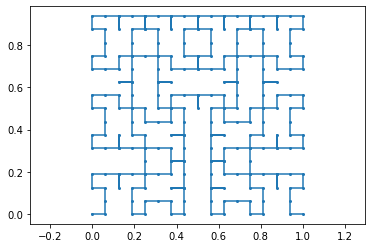

[1. 0.]


In [ ]:
n = 4 
t = 0.2  

bod_na_polygonu = h2d.hilbert_polygon_point(t,n)
print("Bod na aproximačním polygonu:", bod_na_polygonu)

h2d.plot_hilbert_polygon(n)  
print(h2d.hilbert_polygon_point(1.0,n))

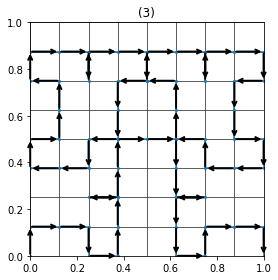

In [ ]:
h2d.plot_multiple_hilberts_arrows([3])

## Vykreslení grafů pro Hilbertovu křivku s posunutím

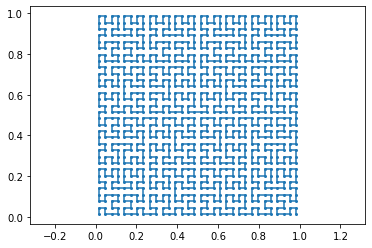

In [ ]:
h2da = Hilbert2D(15)
h2da.plot_mainstream_hilbert_polygon(5)  


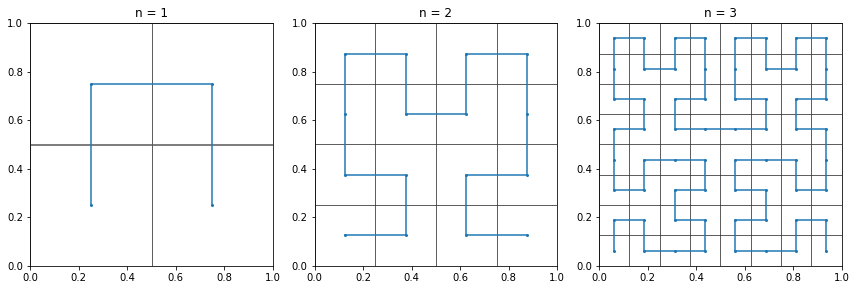

In [ ]:
h2da.plot_multiple_hilberts([1, 2, 3])

# 3D Hilbertova křivka

## Test mezivýpočtů bodu křivky

In [ ]:
h3d = Hilbert3D(20)


h2d_converter = Hilbert3D(20)
L = h2d_converter.dec_to_octal(0.2)
print("Octal L:", L)

h = [2, 0, 6]
result = h3d.ThreeD_Hilbert(h)
print("3D result:", result)




Octal L: [1, 4, 6, 3, 1, 4, 6, 3, 1, 4, 6, 3, 1, 4, 6, 3, 1, 5, 0, 0]
3D result: [0.625 0.75  0.125]


## Hledání minima za pomoci algoritmu z knihovny scipy.optimize

In [ ]:
for n in [2,3,4,5,6,7,8]:
    h3d = Hilbert3D(10)
    t_min, h_min, f_min = h3d.find_minimum(n)
    print(f"precision={n:3d}  =>  t = {t_min:.6f},  h(t) = ({h_min[0]:.4f}, {h_min[1]:.4f}, {h_min[2]:.4f}),  f = {f_min:.6f}")

precision=  2  =>  t = 0.237500,  h(t) = (0.5000, 0.7000, 0.0000),  f = 1.020000
precision=  3  =>  t = 0.236326,  h(t) = (0.3752, 0.7500, 0.0000),  f = 1.004074
precision=  4  =>  t = 0.236768,  h(t) = (0.3125, 0.7000, 0.0000),  f = 1.000078
precision=  5  =>  t = 0.236084,  h(t) = (0.3750, 0.6874, 0.0000),  f = 1.002891
precision=  6  =>  t = 0.236789,  h(t) = (0.2812, 0.7011, 0.0000),  f = 1.000176
precision=  7  =>  t = 0.237254,  h(t) = (0.3281, 0.6472, 0.0078),  f = 1.009602
precision=  8  =>  t = 0.237254,  h(t) = (0.3292, 0.6484, 0.0039),  f = 1.005662


## Hledání minima pomocí Hoelderovského algoritmu

In [ ]:
h3d = Hilbert3D(50)


H = 2 * 1.4142 * 5**(1/2)   # Lipschitz/Hölder odhad
r = 1.1
eps = 1e-5
N = [1,2,3,4,5,6,7,8,9,13,15,16] 
max_iter = 250

for n in N:
    t_min, f_min, x_min, y_min, z_min = h3d.Holder_algorithm(H, r, eps, max_iter,n)
    print(f"Iterace hilbertovy křivky: {n}")
    print(f"  Souřadnice (x,y): ({x_min}, {y_min}, {z_min})")
    print(f"  Hodnota f: {f_min}")
    print("-" * 40)

Iterace hilbertovy křivky: 1
  Souřadnice (x,y): (0.2996653785872082, 0.5, 0.0)
  Hodnota f: 1.020000055985745
----------------------------------------
Iterace hilbertovy křivky: 2
  Souřadnice (x,y): (0.0, 0.7002308730526581, 0.0)
  Hodnota f: 1.0450000266511832
----------------------------------------
Iterace hilbertovy křivky: 3
  Souřadnice (x,y): (0.375146432837278, 0.75, 0.0)
  Hodnota f: 1.0040734931840838
----------------------------------------
Iterace hilbertovy křivky: 4
  Souřadnice (x,y): (0.3125, 0.6995332689602733, 0.0)
  Hodnota f: 1.0000782339189318
----------------------------------------
Iterace hilbertovy křivky: 5
  Souřadnice (x,y): (0.29881784943171397, 0.6875, 0.0)
  Hodnota f: 1.0000788237399831
----------------------------------------
Iterace hilbertovy křivky: 6
  Souřadnice (x,y): (0.21875, 0.6875, 0.011811472835120185)
  Hodnota f: 1.0151903790851202
----------------------------------------
Iterace hilbertovy křivky: 7
  Souřadnice (x,y): (0.373644506634718

## Vykreslení grafu pro 3D křivku

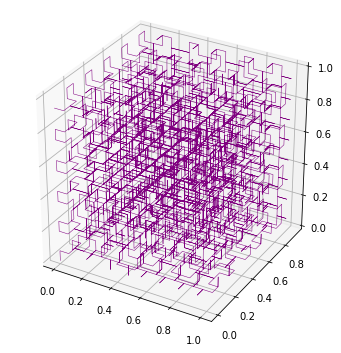

In [ ]:
hilbert = Hilbert3D(10)
hilbert.plot_hilbert_polygon(4)


## Graf posunuté 3D H. křivky

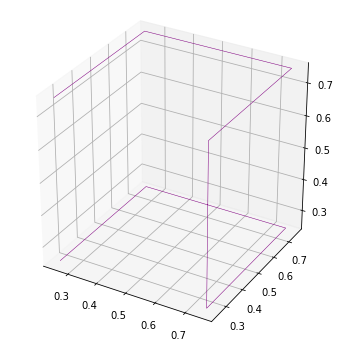

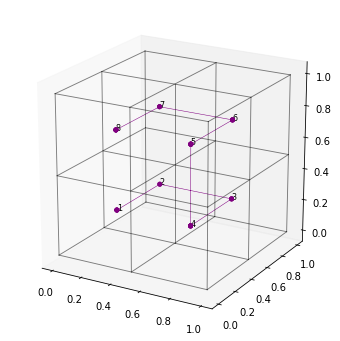

In [ ]:
hilbert.plot_mainstream_hilbert(1)
hilbert.plot_mainstream_hilbert_cubes(1)